In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
x_train = np.array([1, 2, 3, 4, 5], dtype='float')
y_train = np.array([300, 500, 700, 900, 1100], dtype='float')

# Normalize data to prevent overflow
x_mean = np.mean(x_train)
x_std = np.std(x_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

x_train_normalized = (x_train - x_mean) / x_std
y_train_normalized = (y_train - y_mean) / y_std

Predicted prices for w = 100, b = 0: [100. 200. 300. 400. 500.]
Predicted prices for w = 200, b = 0: [ 200.  400.  600.  800. 1000.]
Predicted prices for w = 210, b = 0: [ 210.  420.  630.  840. 1050.]
Predicted prices for w = 250, b = 0: [ 250.  500.  750. 1000. 1250.]
Predicted prices for w = 300, b = 0: [ 300.  600.  900. 1200. 1500.]
Predicted prices for w = 400, b = 0: [ 400.  800. 1200. 1600. 2000.]


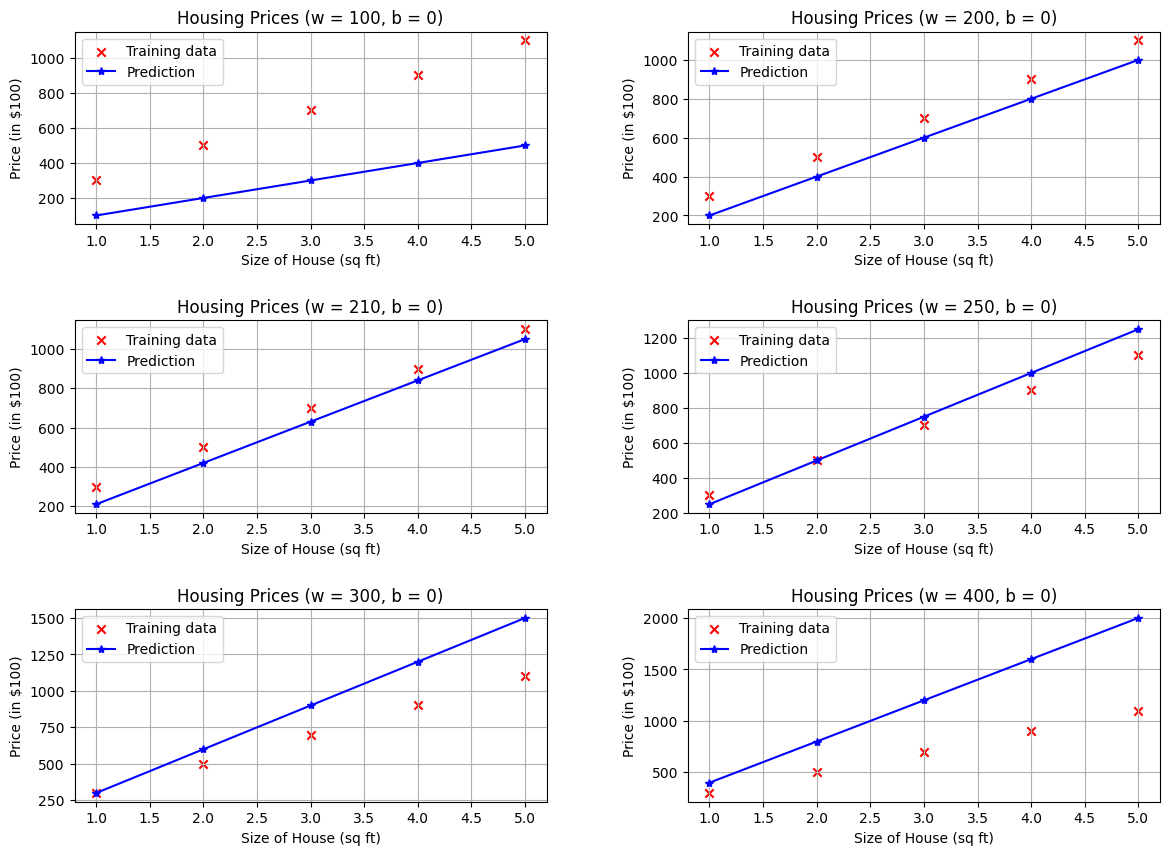

In [3]:
 #Example weights and bias
w = np.array([100, 200, 210, 250, 300, 400])
b = 0

# Prediction function
def predict(w, b, x):
    return w * x + b

# Number of subplots
num_plots = len(w)
rows = (num_plots + 1) // 2  # Calculate the number of rows needed
cols = 2  # Two plots per row

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 10))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each prediction in a separate subplot
for i in range(num_plots):
    pred = predict(w[i], b, x_train)
    print(f"Predicted prices for w = {w[i]}, b = {b}: {pred}")
    axes[i].scatter(x_train, y_train, marker='x', color='red', label='Training data')
    axes[i].plot(x_train, pred, marker='*', color='blue', label='Prediction')
    axes[i].set_title(f"Housing Prices (w = {w[i]}, b = {b})")
    axes[i].set_xlabel('Size of House (sq ft)')
    axes[i].set_ylabel('Price (in $100)')
    axes[i].grid(True)
    axes[i].legend()

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to add space between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

In [4]:
# Cost function
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    cost /= 2 * m
    return cost

# Gradient function
def gradient_function(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [5]:
# Gradient descent function
def gradient_descent(x, y, w_init, b_init, alpha, num_iters):
    w = w_init
    b = b_init
    J_history = []
    p_history = []
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i < 100000:  # prevent resource exhaustion
            J_history.append(compute_cost(x, y, w, b))
            p_history.append([w, b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % (num_iters // 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw:0.3e}, dj_db: {dj_db:0.3e}  ",
                  f"w: {w:0.3e}, b: {b:0.5e}")
    return w, b, J_history, p_history  # return w and J, w history for graphing

In [6]:
# Initialize parameters
w_init = 0
b_init = 0
alpha = 1.0e-2
iterations = 1000

# Run gradient descent
w, b, J_hist, p_hist = gradient_descent(x_train_normalized, y_train_normalized, w_init, b_init, alpha, iterations)

# Scale back the parameters to original scale
w_final = w * (y_std / x_std)
b_final = y_mean - w_final * x_mean

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 4.90e-01  dj_dw: -1.000e+00, dj_db: 0.000e+00   w: 1.000e-02, b: 0.00000e+00
Iteration  100: Cost 6.57e-02  dj_dw: -3.660e-01, dj_db: 0.000e+00   w: 6.376e-01, b: 2.22045e-18
Iteration  200: Cost 8.80e-03  dj_dw: -1.340e-01, dj_db: 0.000e+00   w: 8.674e-01, b: 3.33067e-18
Iteration  300: Cost 1.18e-03  dj_dw: -4.904e-02, dj_db: 0.000e+00   w: 9.514e-01, b: 3.33067e-18
Iteration  400: Cost 1.58e-04  dj_dw: -1.795e-02, dj_db: 0.000e+00   w: 9.822e-01, b: 3.33067e-18
Iteration  500: Cost 2.12e-05  dj_dw: -6.570e-03, dj_db: 6.939e-19   w: 9.935e-01, b: 2.76862e-18
Iteration  600: Cost 2.83e-06  dj_dw: -2.405e-03, dj_db: 5.204e-19   w: 9.976e-01, b: 2.26034e-18
Iteration  700: Cost 3.80e-07  dj_dw: -8.803e-04, dj_db: 3.903e-19   w: 9.991e-01, b: 1.84184e-18
Iteration  800: Cost 5.09e-08  dj_dw: -3.222e-04, dj_db: 3.036e-19   w: 9.997e-01, b: 1.50769e-18
Iteration  900: Cost 6.82e-09  dj_dw: -1.179e-04, dj_db: 2.494e-19   w: 9.999e-01, b: 1.23415e-18
(w,b) found by gradi

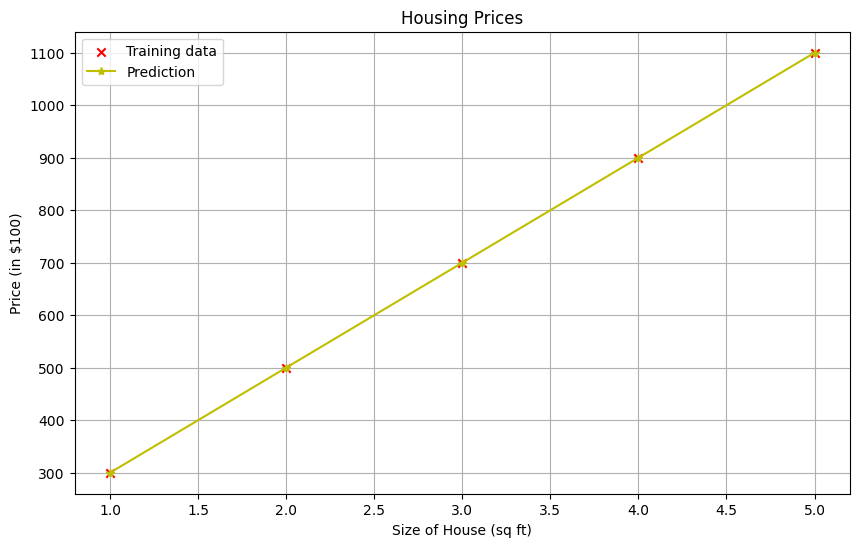

In [7]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, marker='x', color='red', label='Training data')
plt.plot(x_train, w_final * x_train + b_final, marker='*', color='y', label='Prediction')
plt.title("Housing Prices")
plt.xlabel('Size of House (sq ft)')
plt.ylabel('Price (in $100)')
plt.grid(True)
plt.legend()
plt.show()

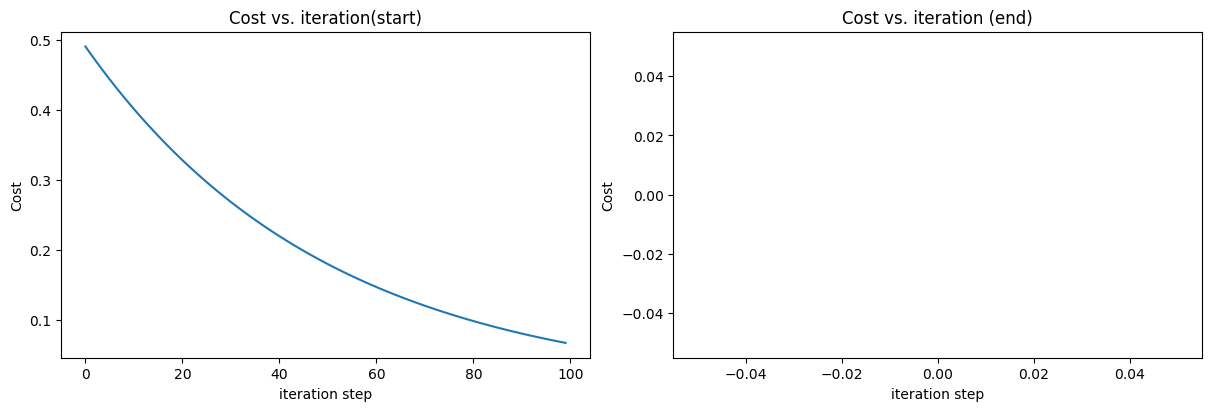

In [8]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

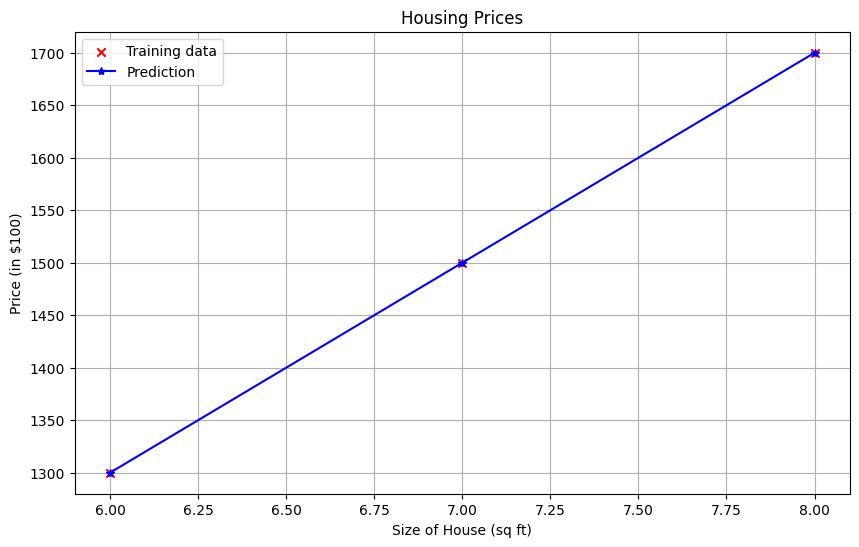

600 sqft house prediction 1300.0 Hundred  dollars
700 sqft house prediction 1500.0 Hundred dollars
800 sqft house prediction 1700.0 Hundred dollars


In [9]:
def predict(x, w, b):
    predicts = []
    for i in range(len(x)):
        f_wb =  w * x[i] + b
        predicts.append(f_wb)
    return predicts


x_test = np.array([6, 7, 8], dtype='float')
y_test = np.array([1300, 1500, 1700], dtype='float')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, marker='x', color='red', label='Training data')
plt.plot(x_test, predict(x_test, w_final, b_final), marker='*', color='b', label='Prediction')
plt.title("Housing Prices")
plt.xlabel('Size of House (sq ft)')
plt.ylabel('Price (in $100)')
plt.grid(True)
plt.legend()
plt.show()

print(f"600 sqft house prediction {w_final*6.0 + b_final:0.1f} Hundred  dollars")
print(f"700 sqft house prediction {w_final*7.0 + b_final:0.1f} Hundred dollars")
print(f"800 sqft house prediction {w_final*8.0 + b_final:0.1f} Hundred dollars")